<a href="https://colab.research.google.com/github/ucfilho/ANN_2021_01/blob/main/RecurrentANN/First_Recurrent_Neural_Network_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [3]:
'''
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
'''

'\nfrom tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten\nfrom tensorflow.keras.models import Model\nfrom tensorflow.keras.optimizers import SGD, Adam\n'

In [4]:
from keras.layers import Input, SimpleRNN, Dense, Flatten
from keras.models import Sequential
from keras.optimizers import SGD, Adam

In [5]:
num = 200
series = np.sin(0.1*np.arange(num)+0.1*np.random.randn(num))

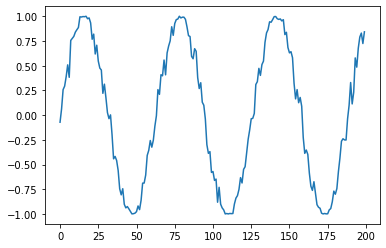

In [6]:
plt.plot(series)

In [7]:
P = 10 # period
D = 1
X = []
Y = []

for t in range(num-P):
  t_next = t+ P
  xx = series[t:t_next]
  X.append(xx)
  yy = series[t_next]
  Y.append(yy)

X = np.array(X).reshape(-1,P,1) # data NxDxP
Y = np.array(Y)
print('input shape',X.shape,'output shape',Y.shape )

input shape (190, 10, 1) output shape (190,)


In [8]:
X[0]

array([[-0.07214703],
       [ 0.0626943 ],
       [ 0.25769664],
       [ 0.29258586],
       [ 0.38772361],
       [ 0.50806966],
       [ 0.38205242],
       [ 0.75540881],
       [ 0.77486041],
       [ 0.79608066]])

In [9]:
N, cols, other = X.shape
X_train = X[:-N//2]
Y_train = Y[:-N//2]
X_test = X[-N//2:]
Y_test = Y[-N//2:]

In [10]:
model = Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(Input(shape=(P,1)))

# Add a LSTM layer with 5 internal units.
model.add(SimpleRNN(5,'relu'))

# Add a Dense layer with 1 units.
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 5)                 35        
_________________________________________________________________
dense (Dense)                (None, 1)                 6         
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(loss='mse',optimizer=Adam(lr=0.1))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [12]:
r = model.fit(X_train,Y_train,
              epochs=100, 
              validation_data = ( X_test ,Y_test ) )

Epoch 1/100
3/3 [==============================] - 19s 291ms/step - loss: 0.3726 - val_loss: 0.0288
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0273 - val_loss: 0.0237
Epoch 3/100
3/3 [==============================] - 0s 20ms/step - loss: 0.0280 - val_loss: 0.0286
Epoch 4/100
3/3 [==============================] - 0s 18ms/step - loss: 0.0259 - val_loss: 0.0195
Epoch 5/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0280 - val_loss: 0.0185
Epoch 6/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0217 - val_loss: 0.0134
Epoch 7/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0188 - val_loss: 0.0185
Epoch 8/100
3/3 [==============================] - 0s 16ms/step - loss: 0.0160 - val_loss: 0.0152
Epoch 9/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0137 - val_loss: 0.0149
Epoch 10/100
3/3 [==============================] - 0s 17ms/step - loss: 0.0152 - val_loss: 0.0159
Epoch 11/100
3/3 

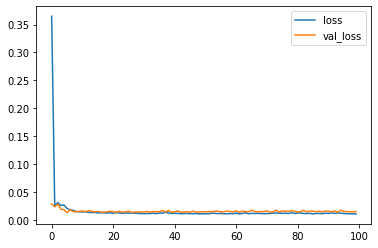

In [13]:
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

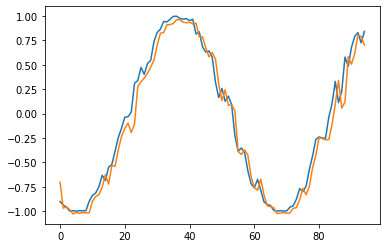

In [14]:
# this is a wrong way to do....
pred_Y = model.predict(X_test)
plt.plot(Y_test, label='prediction target')
plt.plot(pred_Y, label='prediction forecast')

In [15]:
pred_test = []
for xi in X_test:
  yi = model.predict(xi.reshape(1,-1,1))[0,0]
  pred_test.append(yi)

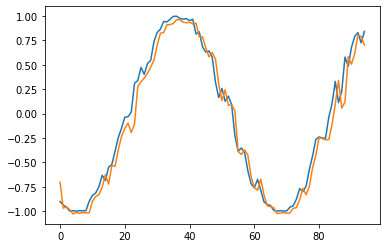

In [16]:
plt.plot(Y_test, label='prediction target')
plt.plot(pred_test, label='prediction forecast')